<div style="text-align:center; margin-top: 1cm;">
    <h2>Київський політехнічний інститут імені Ігоря Сікорського</h2>
    <h2>Приладобудівний факультет</h2>
    <h3>Кафедра автоматизації та систем неруйнівного контролю</h3>
    <br><br><br>
</div>

<div style="text-align:center; margin-top: 5cm;">
    <h2>Практична робота №1 </h2>
    <h2>з предмету "Комп'ютерний зір"</h2>
</div>

<div style="text-align:right; margin-top: 5cm;">
<p>Студент: Погорєлов Богдан<br>
    Група: ПК-51мп<br>
</p>
</div>
<div style="text-align:center; margin-top: 5cm;">
2025 рік  <br><br><br><br>
</div>

Тема: Обробка цифрових зображень. Робота з кольоровими каналами та геометричними зонами.

Мета роботи: 
Розробити програму для модифікації цифрового зображення: зміни кольорових складових у прямокутних зонах, множення каналів на функцію Гаусса в зоні фігури Ліссажу та додавання шуму в аналогічній зоні.

Розробити програму, яка виконує такі дії з цифровими зображеннями (ЦЗ):
1. В 3 зонах прямокутної форми змінює 1, 2 та 3 кольорових складових. Розташування зон визначається
розробником програми.
2. В заданій зоні перемножити значення 1 або 2 кольорових каналів на значеннями, які розраховуються за
допомогою математичних функцій. Геометрична форма зони та тип функції визначається по варіантам
згідно Таблиці 1 (номер варіант – порядковий номер студента у списку групи).
3. В заданій зоні додати до значень 3 кольорових каналів випадкові значеннями з гаусовим або рівномірним
розподілом щільності вірогідності. Геометрична форма зони визначається по варіантам згідно Таблиці 1.

Таблиця 1. Варіанти практичного завдання № 1, 2.

| Тип функції | лемніската Бернуллі | фігура Ліссажу | епіциклоїда | гіпоциклоїда | кардіоїда |
| :--- | :---: | :---: | :---: | :---: | :---: |
| **гармонічна** | 1 | 2 | 3 | 4 | 5 |
| **лінійна** | 6 | 7 | 8 | 9 | 10 |
| **гаусоїда** | 11 | 12 | 13 | 14 | 15 |
| **логарифмічна** | 16 | 17 | 18 | 19 | 20 |
| **кубічна** | 21 | 22 | 23 | 24 | 25 |

Варіант 12

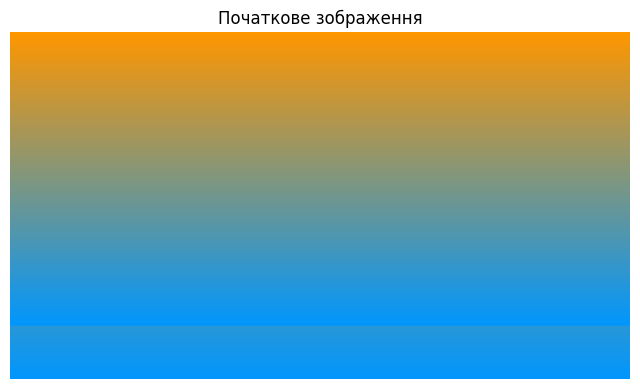

In [8]:
# 1. Імпорт бібліотек та завантаження зображення
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функція для відображення зображень у Notebook
def show_image(img, title="Image"):
    # Конвертуємо BGR в RGB для коректного відображення через matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

height, width = 600, 800

# Заповнимо фон градієнтом для наочності
for i in range(height):
    val = int(255 * i / height)
    image[i, :, :] = [val, 150, 255 - val] # BGR

original_image = image.copy()
show_image(original_image, "Початкове зображення")

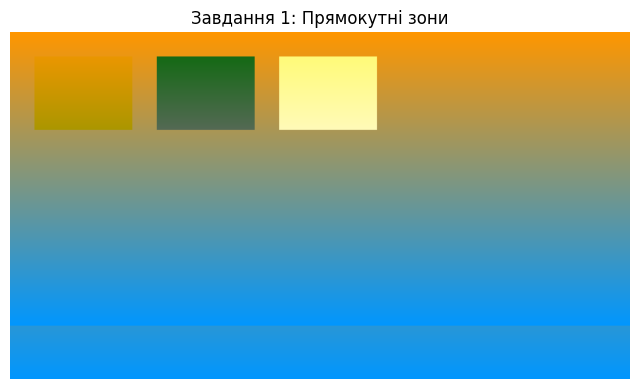

In [ ]:
# 2. Завдання 1: Прямокутні зони
task1_img = original_image.copy()

# --- Зона 1: Зміна 1 каналу (наприклад, обнулення синього каналу) ---
# Координати: y1:y2, x1:x2
task1_img[50:200, 50:250, 0] = 0  # Channel 0 is Blue in OpenCV

# --- Зона 2: Зміна 2 каналів (наприклад, інверсія зеленого та червоного) ---
task1_img[50:200, 300:500, 1] = 255 - task1_img[50:200, 300:500, 1] # Green
task1_img[50:200, 300:500, 2] = 255 - task1_img[50:200, 300:500, 2] # Red

# --- Зона 3: Зміна 3 каналів (наприклад, збільшення яскравості всіх каналів) ---
roi = task1_img[50:200, 550:750]
# Додаємо константу, використовуючи cv2.add для уникнення переповнення (clipping)
task1_img[50:200, 550:750] = cv2.add(roi,np.full(roi.shape,100,dtype=np.uint8))

show_image(task1_img, "Завдання 1: Прямокутні зони")

3. Допоміжні функції (Ліссажу та Гаус)Для варіанту 12 нам необхідно побудувати  фігуру Ліссажу. Її параметричні рівняння:
$$x = A \sin(at + \delta)$$
$$y = B \sin(bt)$$
А також функцію Гаусса:
$$f(x) = e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

In [10]:
# 3. Допоміжні функції (Ліссажу та Гаус)
def create_lissajous_mask(shape, center, size, params):
    """
    Створює бінарну маску у формі фігури Ліссажу.
    params: (a, b, delta)
    """
    h, w = shape[:2]
    mask = np.zeros((h, w), dtype=np.uint8)
    
    cx, cy = center
    rx, ry = size
    a, b, delta = params
    
    # Генеруємо точки
    t = np.linspace(0, 2 * np.pi, 1000)
    x = cx + rx * np.sin(a * t + delta)
    y = cy + ry * np.sin(b * t)
    
    points = np.stack((x, y), axis=1).astype(np.int32)
    
    # Заповнюємо полігон
    cv2.fillPoly(mask, [points], 255)
    return mask

def generate_gaussian_map(shape, center, sigma):
    """
    Генерує 2D карту значень функції Гаусса.
    """
    h, w = shape[:2]
    x = np.arange(0, w, 1, float)
    y = np.arange(0, h, 1, float)
    y = y[:, np.newaxis]
    
    x0, y0 = center
    
    # 2D Gaussian function
    g = np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
    return g

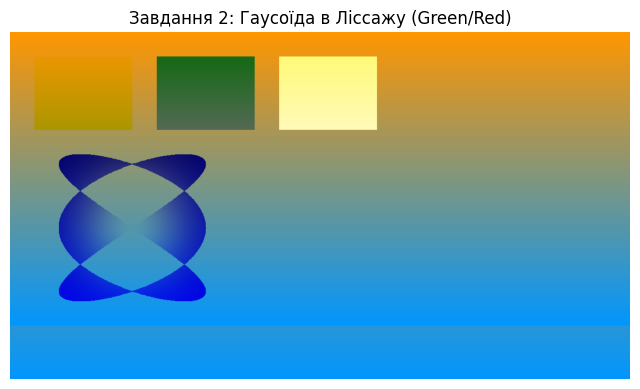

In [ ]:
# 4. Завдання 2: Множення на Гаусоїду в зоні Ліссажу
task2_img = task1_img.copy()

# Параметри для зони Ліссажу
center_liz1 = (250, 400) # x, y
size_liz1 = (150, 150)   # радіуси
params_liz1 = (3, 2, np.pi/2) # a=3, b=2 - класична форма

# 1. Створюємо маску
mask_liz1 = create_lissajous_mask(
    task2_img.shape, center_liz1, size_liz1, params_liz1)

# 2. Створюємо карту Гаусса
gaussian_map = generate_gaussian_map(task2_img.shape, center_liz1, sigma=80)

# 3. Нормалізуємо маску до [0, 1] для множення
binary_mask = (mask_liz1 > 0).astype(float)

# 4. Застосовуємо операцію тільки в зоні маски для каналів 1 (Green) та 2 (Red)
# Формула: New_Pixel = Old_Pixel * Gaussian_Value
# Використовуємо np.where для обмеження дії лише маскою
for ch in [1, 2]:
    channel_data = task2_img[:, :, ch].astype(float)
    modified_channel = channel_data * gaussian_map
    
    # Замінюємо пікселі тільки там, де маска активна
    task2_img[:, :, ch] = np.where(mask_liz1 == 255, 
                                   modified_channel.astype(np.uint8), 
                                   task2_img[:, :, ch])

show_image(task2_img, "Завдання 2: Гаусоїда в Ліссажу (Green/Red)")

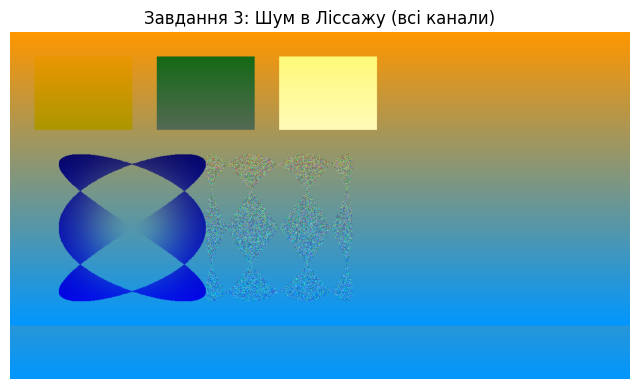

In [ ]:
# 5. Завдання 3: Додавання шуму в зоні Ліссажу
task3_img = task2_img.copy()

# Параметри для другої зони Ліссажу (зсунемо її вправо)
center_liz2 = (550, 400)
size_liz2 = (150, 150)
params_liz2 = (3, 4, 0) # Інша форма (a=3, b=4)

# 1. Створюємо маску
mask_liz2 = create_lissajous_mask(
    task3_img.shape, center_liz2, size_liz2, params_liz2)

# 2. Генеруємо Гаусовий шум
mean = 0
sigma = 50
gauss_noise = np.random.normal(mean, sigma, task3_img.shape).astype(np.int16)

# 3. Додаємо шум до зображення
# Конвертуємо в int16 щоб уникнути переповнення при додаванні, потім кліпаємо
img_int16 = task3_img.astype(np.int16)
noisy_img = img_int16 + gauss_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# 4. Застосовуємо шум тільки в зоні маски для всіх 3 каналів
task3_img = np.where(mask_liz2[:, :, None] == 255, noisy_img, task3_img)

show_image(task3_img, "Завдання 3: Шум в Ліссажу (всі канали)")

Висновки

У ході виконання практичної роботи було розроблено програмне забезпечення на мові Python з використанням бібліотек OpenCV та NumPy для обробки цифрових зображень згідно варіанту 12.

Були реалізовані наступні алгоритми:

Поканальна обробка: Виконано вибіркову зміну інтенсивності пікселів у трьох прямокутних областях для різних каналів (R, G, B).

Геометричне маскування: Реалізовано алгоритм генерації маски у формі фігури Ліссажу ($x = A \sin(at+\delta), y = B \sin(bt)$).

Математичні перетворення: У першій фігурній зоні застосовано мультиплікативне накладання функції Гаусса, що створило ефект віньєтування (затемнення до країв фігури).

Стохастична обробка: У другій фігурній зоні додано адитивний шум з гаусовим розподілом, що демонструє можливість локального зашумлення зображення.

Програма коректно виконує всі поставлені завдання, результати обробки візуалізовані.